Загружаем данные

In [50]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Посмотрим на значение метрики без обработки пропусков.

Удаляем пропуски и категориальные переменные

In [52]:
df1 = df.dropna(subset=['Age'])

In [53]:
X = df1[['Pclass','Age','Fare']]
y = df1['Survived']

Формируем выборки, обучаем модель

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 10)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

Считаем метрику

In [56]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)
auc

0.73884381338742389

Теперь обрабатываем пропуски.

Проверим данные на выбросы

In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно подробнее посмотреть на данные по колонкам Age и Fare

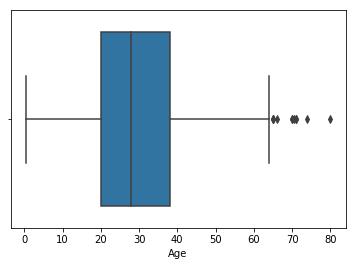

In [58]:
import seaborn as sns
%matplotlib inline
sns.boxplot(data=df,x='Age')

Здесь выбросов нет

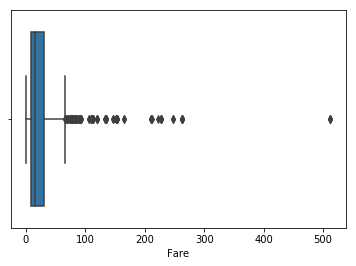

In [59]:
sns.boxplot(data=df,x='Fare')

Посмотрим, что за тариф > 500

In [60]:
df[df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Видим, что на 1 билет куплено не меньше 5 кают 1 класса. Считаем, что все нормально.

Теперь обрабатываем пропуски.

Идентификатор пассажира, имя и номер билета не могли повлиять на выживаемость. Эти признаки можно удалить.

In [61]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


В случае удаления столбца Cabin и пропусков по строкам будет потеряно 22% информации:

In [63]:
(204/(891*9)+(891-714)/891)*100

22.40927796483352

Посмотрим данные пассажиров, для которых неизвестен порт посадки

In [64]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


Заполним их модой для пассажиров 1 класса

In [65]:
df.loc[df[df['Embarked'].isnull()].index,'Embarked'] = df[df['Pclass']==1]['Embarked'].mode()[0]

In [66]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Посмотрим, с какими переменными у признака Age наибольшая связь. Предварительно преобразуем переменные Sex и Embarked.

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [68]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.030394,0.068230,0.039798,-0.224719,1.000000


Сильной связи с другими переменными нет, наиболее значимая - с переменными Pclass и SibSp.
Посмотрим на попарные корреляции на графиках.

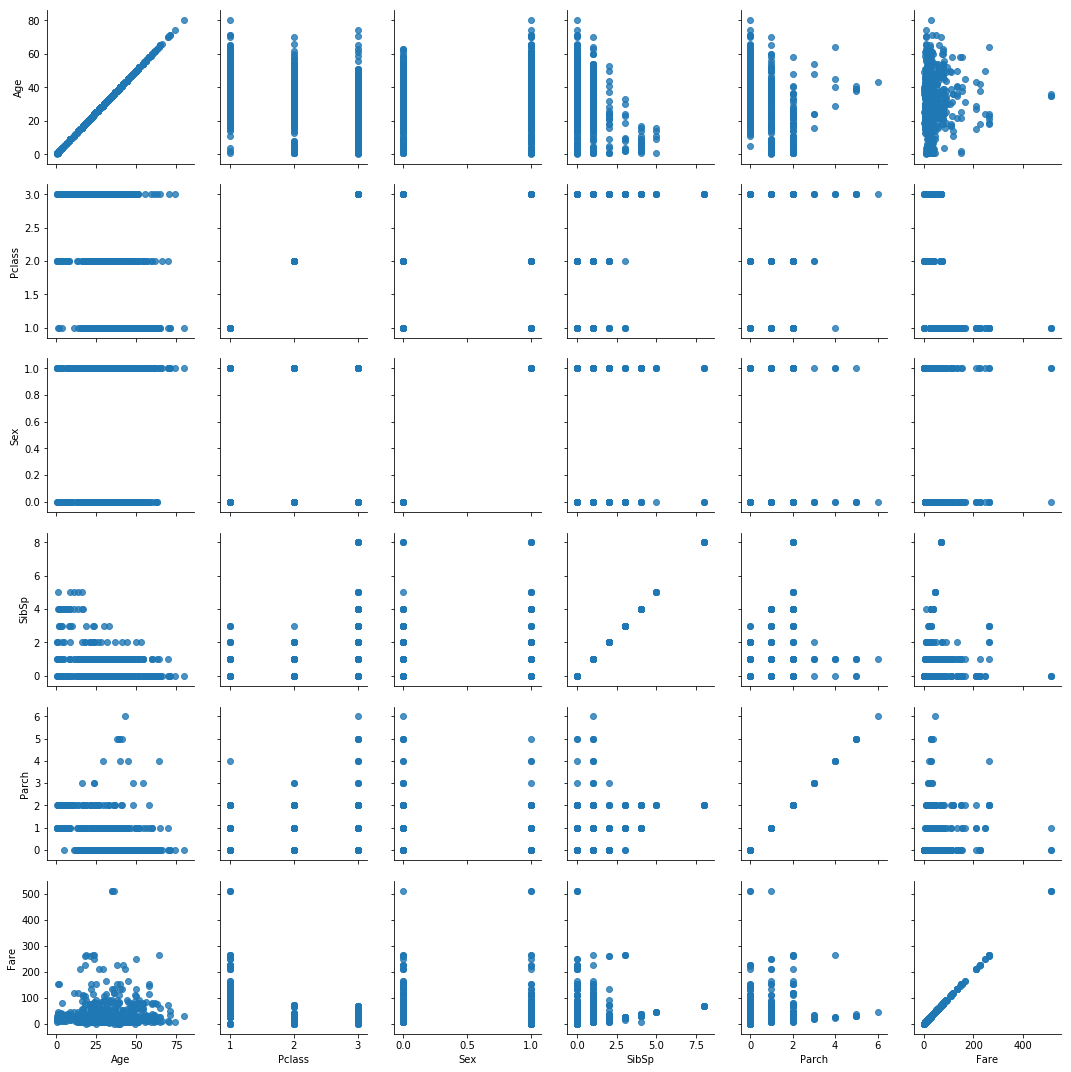

In [69]:
import matplotlib.pyplot as plt
g = sns.PairGrid(df, vars=['Age','Pclass','Sex','SibSp','Parch','Fare'])
g.map(plt.scatter, alpha=0.8)

Некоторая связь наблюдается с переменной SibSp. Установим неизвестные значения возраста как медианы для каждой группы SibSp.

In [70]:
a=df.groupby(['SibSp'])['Age'].median()
a

SibSp
0    29.0
1    30.0
2    23.0
3     9.5
4     6.5
5    11.0
8     NaN
Name: Age, dtype: float64

In [71]:
a.loc[8] = 11
for i in a.index:
    df.loc[(df['Age'].isnull())&(df['SibSp']==i),'Age'] = a.loc[i]

In [72]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Заполним пропуски в номерах кают методом индикатора

In [73]:
df['Cabin_ind'] = 0
df.loc[df[df['Cabin'].isnull()].index,'Cabin_ind'] = 1
df.loc[df[df['Cabin'].isnull()].index,'Cabin'] = '0'
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
Cabin_ind    0
dtype: int64

In [74]:
df['Cabin'] = le.fit_transform(df['Cabin'])

In [75]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,0,3,1,22.0,1,0,7.2500,0,2,1
1,1,1,0,38.0,1,0,71.2833,82,0,0
2,1,3,0,26.0,0,0,7.9250,0,2,1
3,1,1,0,35.0,1,0,53.1000,56,2,0
4,0,3,1,35.0,0,0,8.0500,0,2,1


Посмотрим на распределение признака Age:

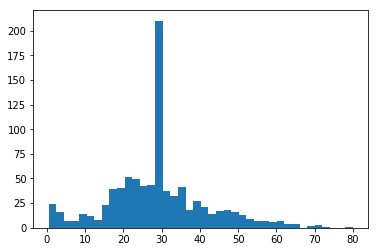

In [77]:
plt.hist(df['Age'],bins=40)
plt.show()

Нормализуем:

In [154]:
import numpy as np

df['Age1'] = np.log(df['Age']-0.419)

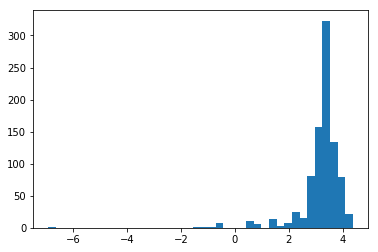

In [156]:
plt.hist(df['Age1'],bins=40)
plt.show()

Обучаем модель, считаем метрику:

In [164]:
X = df.drop(['Survived','Age'],axis=1)
y = df['Survived']


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [167]:
lr = LogisticRegression(random_state = 10)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [168]:
auc = roc_auc_score(y_test, y_pred_proba)
auc

0.87620623104494078

**Выводы.**

Метрика AUC после обработки пропусков увеличилась с 0,74 до 0,88. Это говорит о целесообразности работы с сырыми данными и обработки пропусков, если время и другие возможности позволяют этим заниматься.
Видимо, этот же подход применим и к большим данным: если время и другие ресурсы позволяют, такую обработку нужно выполнить.